<h1> <Center> Detension Basin Design </h1>

<h4> Problem Statement

The SCS Curve Number Method (SCS-CN) is used to obtain the inflow hydrograph into the detention basin from a community for a design storm. The computations are based on the following equations:

$ S = 1000 \left(\frac{1000}{CN} - 10 \right)$  Here, S is the storage in inches, CN is the curve number

$ I_a = \lambda S $ 

Here, $I_a$ is the initial abstraction (in), $\lambda$ is the loss coefficient usually assumed to be 0.2

$ Q = \frac{\left(P-I_a\right)^2}{P-I_a+S} $ 

Where, Q is the cumulative runoff (in).  P is the total precipitation (in) over a duration D.

The peak flow, $Q_p$ (cfs) is given as follows:

$ Q_P = \frac{484 \times A \times Q}{t_p} $  

Where, A is the area in sq. mi; and $t_p$ is the time to peak in hours

The time to peak $t_p$ can be computed from storm duration and lag-time, $t_l$ (the time between the center of mass of the rainstorm and the center of mass of the hydrograph) as:

$t_p = \frac{D}{2} + t_l $ 

Where $t_l$ is in hours.


The lag-time, $t_l$ is related to the time of concentration, $t_c$.  The time of concentration is the time for water to travel from the farthest point in the watershed to the outlet.  Using, Kirpich formula, the time of concentration (min) can be computed from basin slope ($S_c$ and the longest length of the channel, y as:

$ t_c = 0.0078 \times y^{0.77} \times S_c^{-0.385} $

When the fraction of impervious area is high, the time-of-concentration is quicker.  To account for this, the Kirpich equation can be modified as follows:

$ t_c = (0.0078 - 0.00072\times f_{imp}) L^{0.77}\times S_c^{-0.385} $ 

In both cases, the time-of-concentration is in minutes.

The lag-time (min) is taken as 0.6 $t_c$ which is given as:

$t_l = 0.6 \times t_c$ 

Once the lag-time is computed, the time to peak can be computed and tabulation of SCS unit hydrograph can be used to compute the outflow hydrograph.

<font color='blue'>Note Kirpich Formula computes the time of concentration in minutes.  While the Peak flow computation requires it in hours.  So make sure you are consistent with the needs of the formulas. </font>


In [2]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


#Read Dimensionless Unit Hydrograph ---
uh = pd.read_csv("/Users/washemuzzamanlajuk/Desktop/Fall-2025/CAD/Assignment-1/SCS_dimensionless_UH.csv")

In [3]:
print(uh.head())

    tp    Qp
0  0.0  0.00
1  0.1  0.03
2  0.2  0.10
3  0.3  0.19
4  0.4  0.31


<h3> <font color = 'teal'> Pre and Post-Development Curve Numbers Calculation

We are going to assume the pre- and post-development land use to be as follows:  

Pre-Development: 90\% forest (good condition, HSG D) + 10\% urban (small lot, HSG D).  
Overall acreage = 8 square miles.  

Post-Development: 72.5\% impervious/paved (CN = 98, HSG D) + 27.5\% forest (good, HSG D).  

The weighted Curve Numbers are computed as:  
$CN_{\text{pre}} = 80.3 \approx 81$  
$CN_{\text{post}} = 92.8 \approx 93$  

$$
\begin{array}{l c c c}
\text{LULC} & \text{CN} & \text{Pre-Development (\%)} & \text{Post-Development (\%)} \\
\hline
\text{Forests (Good, HSG D)} & 79 & 90.00 & 27.50 \\
\text{Urban -- Small Lot (HSG D)} & 92 & 10.00 & 0.00 \\
\text{Impervious / Paved (HSG D)} & 98 & 0.00 & 72.50 \\
\hline
\text{Composite Curve Number (Pre-Development)} & 81 & & \\
\text{Composite Curve Number (Post-Development)} & 93 & & \\
\end{array}
$$


In [4]:
# Pre-development CN
CN_forest_D = 75.0          # forest, good, HSG D
CN_urban = 94.0  # small lot urban, HSG D

A_forest = 7.2   # area in mi²
A_urban = 0.8    # area in mi²
A_total = A_forest + A_urban

# Weighted CN
CN_pre = (A_forest*CN_forest_D + A_urban*CN_urban) / A_total
print(f"CN_pre = {CN_pre:.1f}")  # ~80.3 

CN_pre = 76.9


In [5]:
# Post-development CN
CN_impervious = 98.0   # impervious, HSG D
CN_forest_D   = 75.0   # forest, good, HSG D

A_impervious = 5.8   # developed area (mi²)
A_forest     = 2.2   # remaining forest (mi²)
A_total      = A_impervious + A_forest

# Weighted CN
CN_post = (A_impervious*CN_impervious + A_forest*CN_forest_D) / A_total
print(f"CN_post = {CN_post:.1f}")  # report with 1 decimal


CN_post = 91.7


<h3> <font color = 'teal'> Estimating Length and Slope for Time of Concentration

The slope is taken to be 2.24% based on DEM data processed

The Channel length is computed using the Hack's formula which is given as:

$ L  = 1.4 A^{0.6}$

Where the channel length, L is in miles, and Watershed area is in Sq. mi.

<h5> <font color = 'purple'> Slope Calculation

Median slope = 2.24%
IQR=0.00%


Text(0.5, 1.0, 'DEM near Spring, TX')

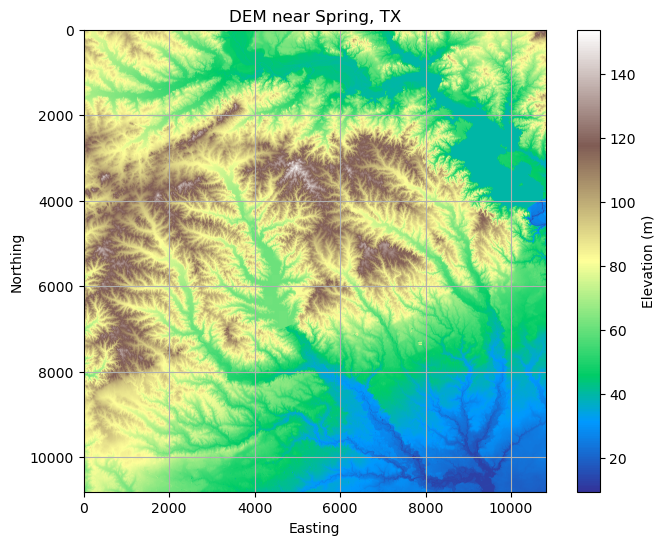

In [6]:
# Read the DEM for a location and compute % slope 
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import os


# Download DEM from USGS 3DEP Program.  
path = '/Users/washemuzzamanlajuk/Desktop/Fall-2025/CAD/Assignment-1'
fname = 'USGS_13_n31w096_20240229.tif'
os.chdir(path)


with rasterio.open(fname) as src:
    dem = src.read(1).astype(float)
    transform = src.transform

cellsize_x = 9.7 # pixel width in m
cellsize_y = 9.7 # pixel height in m

# compute dz/dx and dz/dy 
dz_dy, dz_dx = np.gradient(dem, cellsize_y, cellsize_x)

# magnitude of slope
slope_radians = np.arctan(np.sqrt(dz_dx**2 + dz_dy**2))

# convert to percent
slope_percent = np.tan(slope_radians) * 100

# Compute median and IQR
median_slope = np.nanmedian(slope_percent)
slope3Q = np.nanpercentile(slope_percent,0.75)
slope1Q = np.nanpercentile(slope_percent,0.25)
IQR = slope3Q - slope1Q
print(f"Median slope = {median_slope:.2f}%")
print(f'IQR={IQR:.2f}%')

# Plot Figure
fig, ax = plt.subplots(figsize=(8,6))
im = ax.imshow(dem, cmap='terrain')  # 'terrain' colormap works well for elevation
plt.colorbar(im, ax=ax, label='Elevation (m)')
ax.set_xlabel('Easting')
ax.set_ylabel('Northing')
plt.grid()
plt.title('DEM near Spring, TX')

<h5> <font color = 'purple'> Length Calculation by Hack's Law

In [7]:
# Length by Hack's Law
A_pre, A_post = 8.0, 5.8  # mi^2
L_pre  = 1.4*(A_pre**0.6)   # miles
L_post = 1.4*(A_post**0.6)  # miles
print(f"L_pre  ≈ {L_pre:.2f} mi")
print(f"L_post ≈ {L_post:.2f} mi")

L_pre  ≈ 4.88 mi
L_post ≈ 4.02 mi


<h3> Pre vs Post Hydrographs (50-yr & 100-yr, 6-hr) 

In [8]:
# Function to compute time of concentration using Kirpich Formula and compute time to peak
def tpeak(Sc,D,L,fimp=0):
    y = L * 5280
    tc = (0.0078 - 0.00072*fimp) * y**0.77 * Sc**(-0.385) 
    tc = tc/60 # convert to hours
    tl = 0.6 * tc
    tp = tl + D/2 # Note are in hours
    return(tp)

In [9]:
# Function to compute Peak flow
def Qpeak(P,CN,K,A,tp):
    S = 1000/CN - 10
    Ia = K*P
    Q = (P-Ia)**2/(P-Ia + S)
    Qp = 484*A*Q/tp
    return(Qp)

In [10]:
#A Wrapper Function for tc and Qpeak 
def peak(Sc,D,L,fimp,P,CN,K,A):
    tp = tpeak(Sc,D,L,fimp)
    Qp = Qpeak(P,CN,K,A,tp)
    return(tp,Qp)

In [11]:
# A function to obtain hydrograph from Qpeak, tpeak, and SCS unit hydrograph
def hydrograph(tp,Qp):
    tx = uh.tp*tp
    Qx = uh.Qp * Qp
    return(tx,Qx)

In [12]:
# Compute detention basin volume in acre-feet
def basinvol(tpre,Qpre,tpost,Qpost):
    tmax = np.max(tpost)
    tx = np.linspace(0,tmax,240)
    Qpreint = InterpolatedUnivariateSpline(tpre, Qpre, k=1)  # exact linear interpolation
    Qpostint = InterpolatedUnivariateSpline(tpost, Qpost, k=1) 
    diff = Qpostint(tx) - Qpreint(tx)
    V = np.trapezoid(diff,tx)
    V = V * 3600 /43560 # convert hr to sec and then convert ft^3 to ac-ft
    return(V)

<h3> <font color='purple'> Pre-Development Scenarios

In [13]:
# Input Parameters
A = 8 # Watershed area in miles
D = 6 # storm duration in hours
P100 = 11.20 # total storm volume in inches (from Atlas 14)
P50 = 9.39 # total storm volume in inches (from Atlas 14)
CNpre = 77 # Based on watershed characteristics (typical value for residential areas)
Sc = 0.0224 # slope of the watershed (ft/ft) assumed here to be 2%
L = 1.4*A**0.6 # Length of the watershed in miles (easier to specify, need it ft)
fimppre = 0 # Assumed
K = 0.2  # Storage min
CNpost = 92
fimppo = 0.8 * 5/8  # 80% of new development of 5 sq. miles is impervious 

<h5> <font color = 'purple'>100 Year Storm

In [14]:
tprepeak100,Qprepeak100 =  peak(Sc,D,L,fimppre,P100,CNpre,K,A)
print(f'time to peak (hr):{np.round(tprepeak100,2)} and Peak Flow (cfs):{np.round(Qprepeak100,2)}')

time to peak (hr):3.84 and Peak Flow (cfs):6778.72


In [15]:
tpre100,Qpre100 = hydrograph(tprepeak100,Qprepeak100)

<h5> <font color = 'purple'>50 Year Storm

In [16]:
tprepeak50,Qprepeak50 =  peak(Sc,D,L,fimppre,P50,CNpre,K,A)
print(f'time to peak (hr):{np.round(tprepeak50,2)} and Peak Flow (cfs):{np.round(Qprepeak50,2)}')

time to peak (hr):3.84 and Peak Flow (cfs):5421.93


In [17]:
tpre50,Qpre50 = hydrograph(tprepeak50,Qprepeak50)

<h3> <font color='green'> Post-Development Scenarios

<h5> <font color = 'green'>100 Year Storm

In [18]:
tpostpeak100,Qpostpeak100 =  peak(Sc,D,L,fimppo,P100,CNpost,K,A)
print(f'time to peak (hr):{np.round(tpostpeak100,2)} and Peak Flow (cfs):{np.round(Qpostpeak100,2)}')

time to peak (hr):3.8 and Peak Flow (cfs):8322.87


In [19]:
tpost100,Qpost100 = hydrograph(tpostpeak100,Qpostpeak100)

<h5> <font color = 'green'>50 Year Storm

In [20]:
tpostpeak50,Qpostpeak50 =  peak(Sc,D,L,fimppo,P50,CNpost,K,A)
print(f'time to peak (hr):{np.round(tpostpeak50,2)} and Peak Flow (cfs):{np.round(Qpostpeak50,2)}')

time to peak (hr):3.8 and Peak Flow (cfs):6860.84


In [21]:
tpost50,Qpost50 = hydrograph(tpostpeak50,Qpostpeak50)

<h3> Plot Inflow and Outflow Hydrographs

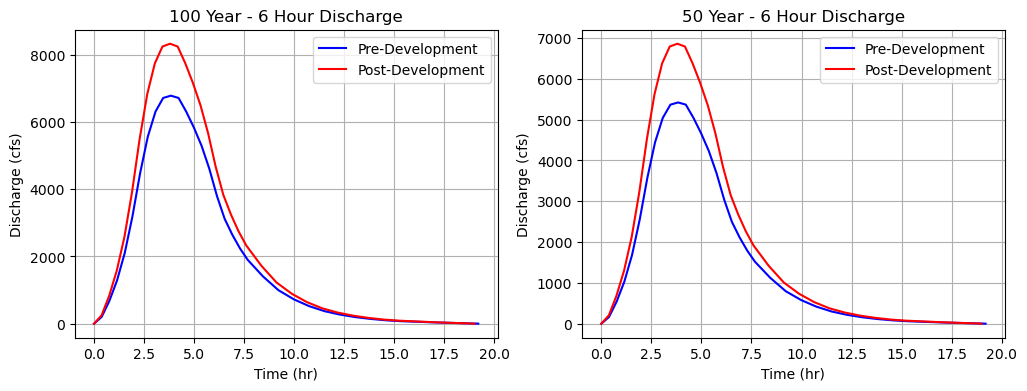

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 3 columns
ax[0].plot(tpre100,Qpre100,'b-',label='Pre-Development')
ax[0].plot(tpost100,Qpost100,'r-',label='Post-Development')
ax[1].plot(tpre50,Qpre50,'b-',label='Pre-Development')
ax[1].plot(tpost50,Qpost50,'r-',label='Post-Development')
ax[0].set_xlabel('Time (hr)')
ax[0].set_ylabel('Discharge (cfs)')
ax[0].set_title('100 Year - 6 Hour Discharge')
ax[1].set_title('50 Year - 6 Hour Discharge')
ax[1].set_xlabel('Time (hr)')
ax[1].set_ylabel('Discharge (cfs)')
ax[0].grid()
ax[1].grid()
ax[0].legend()
ax[1].legend()
plt.show()

In [23]:
from scipy.interpolate import InterpolatedUnivariateSpline
V100 = basinvol(tpre100,Qpre100,tpost100,Qpost100)
V50 = basinvol(tpre50,Qpre50,tpost50,Qpost50)
print(f' The estimated Basin Volume for 100 Year Flood:{np.round(V100,2)} and for 50 year Flood: {np.round(V50,2)}') 

 The estimated Basin Volume for 100 Year Flood:618.92 and for 50 year Flood: 580.56


In [24]:
zzd = {'tpre':tpre100, 'Qpre':Qpre100,'tpost':tpost100,'Qpost':Qpost100}
zzp = pd.DataFrame(zzd)
zzp.to_csv('prepost100year.csv',index=False)

zzx = {'tpre':tpre50, 'Qpre':Qpre50,'tpost':tpost50,'Qpost':Qpost50}
zzx = pd.DataFrame(zzd)
zzx.to_csv('prepost50year.csv',index=False)

<h3> <font color='teal'> Sediment Forebay and Main Basin Design

<h5> <font color='purple'> Problem Statement

Water balance equations are written to solve for a sediment forebay and a detention basin system.  The sediment forebay is modeled as a rectangular channel and the detention basin is modeled as a prismatic trapezoidal channel (rectangular bottom) and a trapezoidal cross-section parallel to the direction of the flow.  

The inflow into the sediment forebay is the stormflow hydrograph.  The outflow from the forebay is via a sharp crested wier.  The flow is activated once the water is above a height 'h'.  The outflow is through a sharp-crested wier that extends to a length L in the direction normal to the outflow.

The detention basin receives the outflow from the sediment forebay and water moves under gravity through the basin.  The outflow is controlled by two orifices.  One is located near the bottom while the other is near the top.  The schematic shows the plan view and two cross-sections.  

<h4> Mathematical Model

<h6> Modeling Sediment Forebay Flows

For simplicity the sediment forebay is modeled as a rectangular channel.  The bottom is of width W and length L.  The depth of the forebay is H.  Flowrate entering the sediment forebay is known and denoted by $Q_{in}(t)$.  The outflow is through a sharp crested wier.  The outflow is proportional to the height of the water above the wier.  In other words, outflow is proportional to (H-$h_1$) and occurs when this term is positive.  The material balance equation for the sediment forebay is given as:

$\frac{dV_1}{dt} = Q_{in} - Q_1$

$ A\frac{dh_1}{dt} = Q_{in} - Q_1$

$\frac{dh_1}{dt} = \frac{Q_{in} - Q_1}{A} $                                                          (equation 1)

The area A can be computed as:

$A = L \times W$

Where W is the witdh of the sediment forebay (along the flow direction) and L is the length (normal to the flow direction). The outflow can be written as:

$Q_1 = C_d \sqrt{2g}\times L \times (h_1-H)^{1.5} \times Hs(h_1 - H) $

Where, $C_d$ is a coefficient ~0.6 - 0.65; g is the accelration due to gravity; $(h_1 - H)$ is the effective height of water above the sharp-crested weir.  $H_s$ is the **Heaviside Step Function**, which assumes a value of 1 when $h_1 - H$ is greater than 0 or it is zero otherwise.  This ensures that the outflow only occurs when the sediment forebay is full.  This configuration creates a situation where the sediment forebay will retain a certain amount of water and discharge the rest to the detention basin.

To solve the above ODE (equation 1) we also need to specify the initial depth, $h_0$


<h6> Modeling Detention Basin

The outflow from the sediment forebay becomes the inflow into the sediment basin.  The Outflow into the sediment basin occurs through two outlets.  There is flow through the lower orifice which occurs almost instantly and there is outflow from the larger orifice whose center  is placed at a height $H_u$ from the bottom.  In general orifice flow does not occur till the height equal to water depth reaches the center of the orifice. The mass balance expression can be written as:

$\frac{dV_2}{dt} = Q_1 - Q_{o,b} - Q_{o,t}$

The discharge through the orifice begins when the water height in the basin goes above its bottom. However, the discharge is partial until the height of the water is below the center of the orifice.  The rate of discharge is proportional to the height above the datum.  The datum is taken as the bottom of the orifice when the hydraulic head (water level) in the basin is below the center of the Orifice (partial discharge condition).  The flow is assumed to increase linearly with depth as the water level rises from the bottom of the orifice to the center.  The Orifice center is taken as the datum when the water level is over it (full discharge condition).   The flow equation is given as:

$
Q(h) =
\begin{cases}
0, & h \leq h_b \\[1ex]
C_d \, A \, \sqrt{2 g (h - h_b)} \, \dfrac{h - h_b}{h_c - h_b}, & h_b < h < h_c \\[2ex]
C_d \, A \, \sqrt{2 g (h - h_c)}, & h \geq h_c
\end{cases}
$

As there are two orifices, we need to use the above equation twice with appropriate bottom and center heights measured say from the bottom of the basin.

Note that the volume, $V_2$ varies with depth $(h_2)$.  This is because, the detention basin is trapezoidal.  If side-wall is at an angle of $\theta$ with the vertical.  Then the volume can be written as:

$ V_2 = A \times L $

The area, A is also a function of h (as the channel is trapezoidal and can be written as:

$ A = (B + h_2tan(\theta))h_2 $

The volume can then be written as:

$ V_2 = L(B + h_2tan(\theta))h_2 = LBh_2 + h_2^2Ltan(\theta)$

$\frac{dV_2}{dt} = LB\frac{dh_2}{dt} + 2h_2Ltan(\theta) \frac{dh_2}{dt} $

Collecting terms we can write the final differential equation as:

$\frac{dh_2}{dt} = \frac{Q_1 - Q_{o,b} - Q_{o,t}}{(LB + 2Ltan(\theta)h_2}$  (equation 2)

To solve the ODE (equation 2) we need to know the initial height of water in the detention basin $h_2(t=0) = h_{2i}$.

<h3> Code

In [4]:
from scipy.interpolate import make_interp_spline
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import os

In [5]:
path = '/Users/washemuzzamanlajuk/Desktop/Fall-2025/CAD/Assignment-1/'
os.chdir(path)

In [6]:
# Function for inflow hydrograph interpolation
fname = 'prepost100year.csv'
a = pd.read_csv(fname)
a.head()

,tpre,Qpre,tpost,Qpost
0,0.000000,0.000000,0.000000,0.000000
1,0.383835,203.361691,0.379965,249.686087
2,0.767669,677.872303,0.759931,832.286958
3,1.151504,1287.957375,1.139896,1581.345219
4,1.535338,2101.404138,1.519861,2580.089569


In [7]:
print(a.head())
print("tpost min/max:", a.tpost.min(), a.tpost.max())

       tpre         Qpre     tpost        Qpost
0  0.000000     0.000000  0.000000     0.000000
1  0.383835   203.361691  0.379965   249.686087
2  0.767669   677.872303  0.759931   832.286958
3  1.151504  1287.957375  1.139896  1581.345219
4  1.535338  2101.404138  1.519861  2580.089569
tpost min/max: 0.0 18.99826646754752


In [8]:
tposts = a.tpost*86400
Qine = make_interp_spline(tposts,a.Qpost)

In [9]:
# Call interpolation function and return value of 0 if the interpolation leads to a negative value
def Qins(t):
    Qe = Qine(t)
    if(Qe < 0):
        Qe = 0
    return(Qe)

In [10]:
# Function to compute the outflow through a sharp-crested weir
def Q1(h,H,L,Cdw):
    g = 32.2 # feet per second square
    if(h <= H):
        Q = 0
    else:
        Q = Cdw * L * np.sqrt(2*g)*np.power((h-H),1.5)
    return(Q)

In [11]:
# Function to compute the outflow through an orifice of diameter (d)
def Qo(h,hb,do,Cd):
    g = 32.174  # acceleration due to gravity ft/s2
    A = np.pi*np.power(do,2)/4
    hc = hb + do/2
    if (h <= hb):
        Q = 0
    elif(h > hb and h <= hc):
        Q = Cd * A * np.sqrt(2*g * (h-hb)) * (h - hb)/(hc-hb)
    else:
        Q = Cd * A * np.sqrt(2*g * (h-hc)) 
    return(Q)


In [12]:
# Function for ODEs:
# Length dimensions are in ft and time dimensions are in sec.
# t: time, h =[h1,h2],weir coeff:Cw, Ls,Ws,Hs (dimensions of sediment forebay); Bb: Bottom width || to the flow; Co: Orifice discharge
# Lb, Length of the basin along flow direction; hb,db,hu,du (bottom height and radius of orifice, b for bottom and u for upper); 
# theta is the vertical angle, Hb: Max height of the basin; Hb + 2Hb tan(theta) is the top width at the two ends; 
# Ls <= Hb + 2Hbtan(theta) to ensure flow does not spill out from the sediment forebay

def dhdt(t,h,Cw,Cdo,Ls,Ws,Hs,Bb,Wb,hb,db,hu,du,theta):
    h1,h2 = h
    A = Ls * Ws
    Qi = Qins(t)
    Q1o = Q1(h1,Hs,Ls,Cw)
    dh1dt = (Qi - Q1o)/A
    thetar = theta * np.pi/180  # convert to radians
    Q21o = Qo(h2,hb,db,Cdo)
    Q22o = Qo(h2,hu,du,Cdo)
    dnum = (Wb*Bb + 2 *h2* Wb*np.tan(thetar))  
    dh2dt = (Q1o - Q21o - Q22o)/dnum
    dhxdt = [dh1dt,dh2dt]
    return(dhxdt)

<h5> Define Design Parameters

In [83]:
Cw = 0.9  # coefficient of discharge of sharp crested weir
Cdo = 0.62 # coefficient of discharge of orifice
Ls = 40  # Length of the sediment forebay (normal to the flow direction); Ft
Ws = 90  # Width of the sediment forebay (Direction of flow direction); Ft
Hs = 8  # Depth of the sediment forebay (height of the water); Ft
Bb = 45 # Bottom Width of the Detention basin (should be >=Ls); Ft
Wb = 850 # Length of the detention basin in the direction of flow; Ft
hb = 0.25 # height of bottom orifice bottom from LSD; Ft
db = 0.5 # Diameter of the bottom orifice
hu = 13 # Height of the bottom of the upper orifice from LSD; Ft
du = 8 # Diameter of the upper Orifice
theta = 63.435 # degrees measures in the vertical

<h6> Solve the ODE (digital prototype)

In [84]:
# Initial conditions
ho = [0.24, 0.10]
# Time span
days = 15
t_span = (0, 86400*days)
t_eval = np.linspace(t_span[0], t_span[1], 240)

# Solve with LSODA
sol = solve_ivp(dhdt, t_span, ho, args=(Cw,Cdo,Ls,Ws,Hs,Bb,Wb,hb,db,hu,du,theta), method='LSODA', t_eval=t_eval)

In [85]:
# Vectorize functions for plots
Qin = np.vectorize(Qins)
Qfb = np.vectorize(Q1)
Qbo = np.vectorize(Qo)

<h6> Compute Discharge

In [86]:
Qinflow = Qin(sol.t)
Qforebay = Qfb(sol.y[0],Hs,Ls,Cw)
QdetL = Qbo(sol.y[1],hb,db,Cdo)
QdetU = Qbo(sol.y[1],hu,du,Cdo)
thr = sol.t/3600  # Convert time from sec to minutes

<h6> Make Inflow and Discharge Plots

In [87]:
data = {"Inflow":(thr,Qinflow),"Forebay_Outflow":(thr,Qforebay),"Lower_Orifice":(thr,QdetL),"Upper_Orifice":(thr,QdetU)}

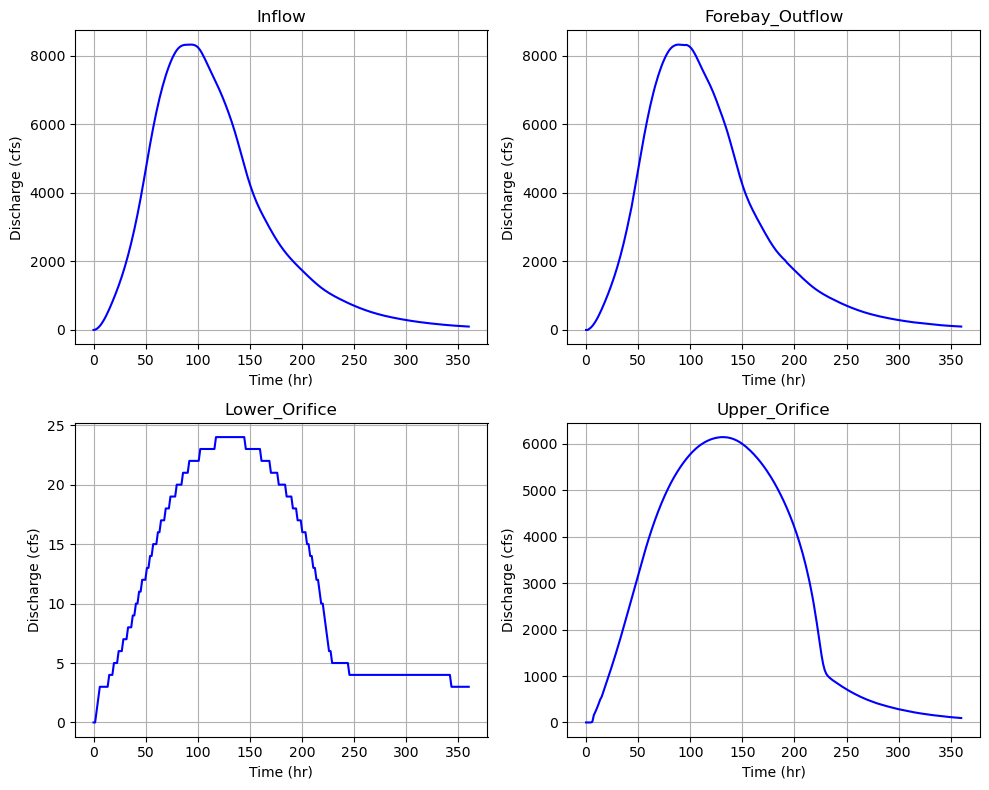

In [88]:
# Create 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()
# Loop over dictionary items and axes
for ax, (title, (x, y)) in zip(axs, data.items()):
    ax.plot(x, y,'b-')
    ax.set_title(title)
    ax.set_xlabel('Time (hr)')
    ax.set_ylabel('Discharge (cfs)')
    ax.grid()
    
plt.tight_layout()
plt.show()

<h6> Compare Inflow and Outflow Hydrographs

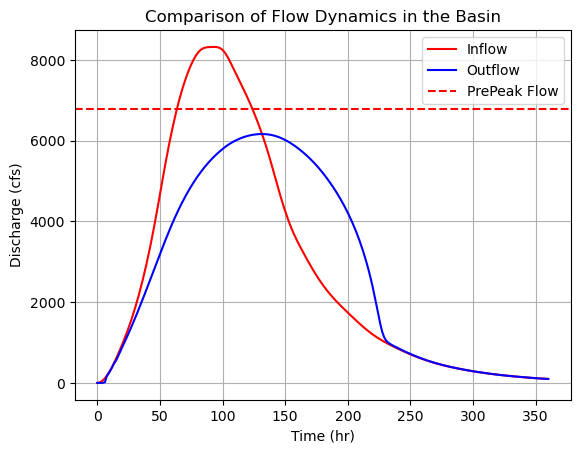

In [89]:
Qout = QdetL + QdetU
plt.plot(thr,Qinflow,'r-',label='Inflow')
plt.plot(thr,Qout,'b-',label='Outflow')
plt.axhline(y=np.max(a.Qpre), color='r', linestyle='--',label='PrePeak Flow')  # horizontal line at Max Peak Pre-Development Flow'
plt.xlabel('Time (hr)')
plt.ylabel('Discharge (cfs)')
plt.title('Comparison of Flow Dynamics in the Basin')
plt.legend()
plt.grid()

<h5> Volume and Area Calculations

In [90]:
Vforebay = (Ls*Ws*Hs)/43560
Aforebay = (Ls*Ws)/43560
hmax = np.max(sol.y[1])
Bt = Bb + 2*hmax*np.tan(theta*np.pi/180)
Vbasin = ((Bt+Bb)/2*hmax * Wb)/43560
Abasin = ((Bt+Bb)/2* Wb)/43560
AV = {'Forebay':np.round([Vforebay,Aforebay],3),'Basin':np.round([Vbasin,Abasin])}
print(AV)

{'Forebay': array([0.661, 0.083]), 'Basin': array([15590.,    25.])}


In [91]:
# Volumes (acre-ft) and Areas (acres)
Vforebay, Aforebay = 1.469, 0.184
Vbasin, Abasin     = 13494., 20.0

# Conversion factor
ACRES_PER_SQMI = 640.0

# Convert to square miles
Aforebay_sqmi = Aforebay / ACRES_PER_SQMI
Abasin_sqmi   = Abasin / ACRES_PER_SQMI

# Print results
print("Forebay:")
print(f"  Volume = {Vforebay} acre-ft")
print(f"  Area   = {Aforebay} acres = {Aforebay_sqmi:.6f} sq mi\n")

print("Basin:")
print(f"  Volume = {Vbasin} acre-ft")
print(f"  Area   = {Abasin} acres = {Abasin_sqmi:.6f} sq mi\n")

# Total square miles
total_sqmi = Aforebay_sqmi + Abasin_sqmi
print(f"TOTAL AREA = {total_sqmi:.6f} sq mi")


Forebay:
  Volume = 1.469 acre-ft
  Area   = 0.184 acres = 0.000287 sq mi

Basin:
  Volume = 13494.0 acre-ft
  Area   = 20.0 acres = 0.031250 sq mi

TOTAL AREA = 0.031538 sq mi


In [92]:
print("H (weir crest) =", Hs, "ft")
print("Forebay max depth h1_max =", np.max(sol.y[0]), "ft")
print("Any time with h1 > H? ", bool(np.any(sol.y[0] > Hs)))
print("Max forebay weir outflow Q1_max (cfs):", np.max(Qfb(sol.y[0], Hs, Ls, Cw)))


H (weir crest) = 8 ft
Forebay max depth h1_max = 17.39911407682016 ft
Any time with h1 > H?  True
Max forebay weir outflow Q1_max (cfs): 8324


In [93]:
print(hmax)

620.8863830088358


In [94]:
print(Hs)

8
